# ミューチュアルインフォメーションによる特徴量の選択

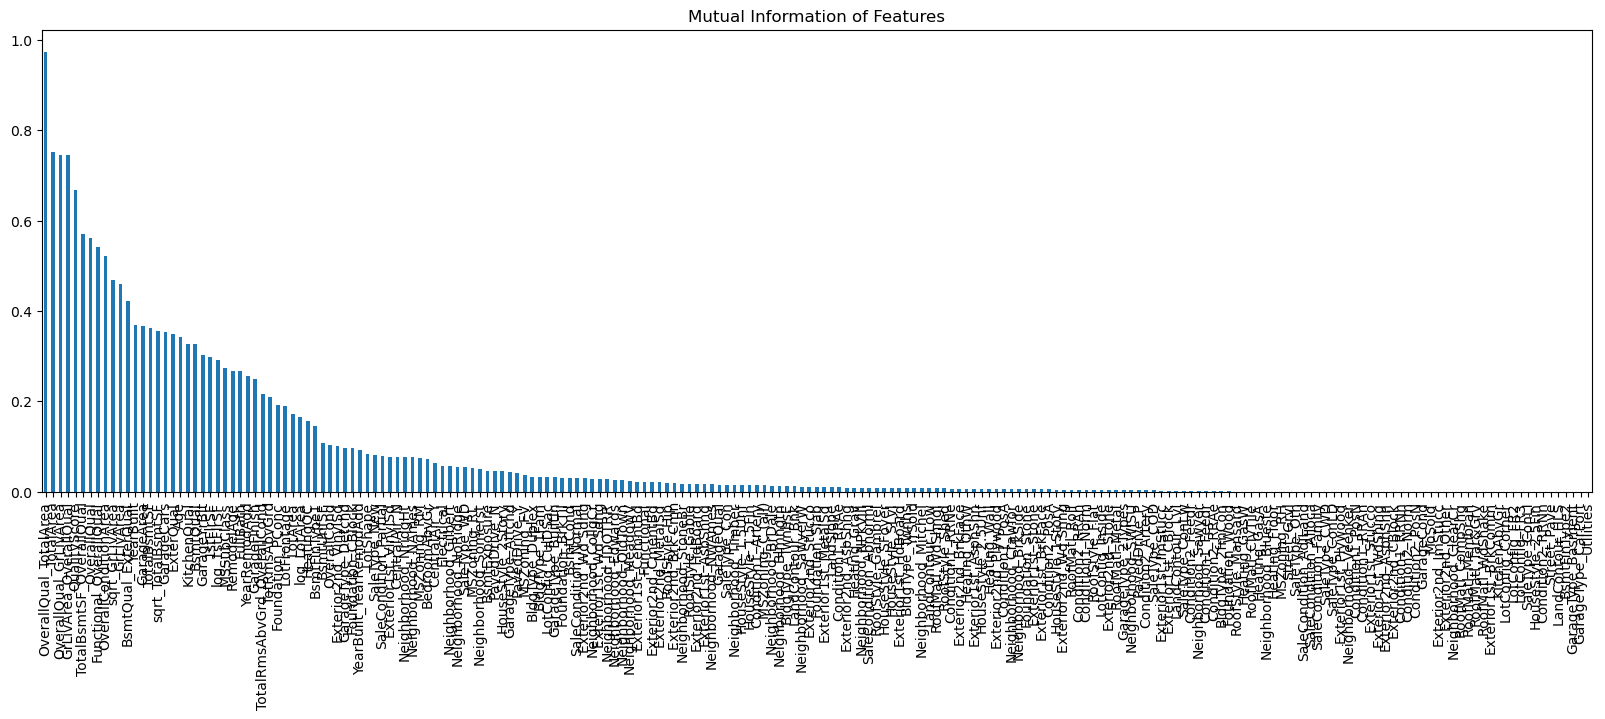

Selected top 20% features after removing duplicates: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GrLivArea_OverallQual', 'TotalBsmtSF_OverallQual', 'TotalArea', 'QualityScore', 'Age', 'RemodelAge', 'OverallConditionArea', 'TotalRmsAbvGrd_OverallCond', 'Functional_OverallQual', 'log_LotArea', 'sqrt_GrLivArea', 'OverallQual_GrLivArea', 'log_1stFlrSF', 'sqrt_TotalBsmtSF', 'OverallQual_TotalArea', 'BsmtQual_ExterQual', 'Exterior2nd_VinylSd', 'Foundation_CBlock', 'Foundation_PConc', 'GarageType_Detchd']
Selected features data saved to /Users/hayakawakazue/Downloads/house_price/train/selected_train_data.csv


In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_encoded.csv'
data = pd.read_csv(data_path)

# 無限値をNaNに置き換え
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN値を中央値で補完
for column in data.columns:
    if data[column].isnull().any():
        data[column].fillna(data[column].median(), inplace=True)

# IDカラムのドロップ
data.drop(columns=['Id'], inplace=True, errors='ignore')

# 特徴量とターゲットの分離
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# ミューチュアルインフォメーションを計算
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# ミューチュアルインフォメーションの可視化
plt.figure(figsize=(20, 6))
mi_series.plot.bar()
plt.title('Mutual Information of Features')
plt.show()

# 上位20%の特徴量を選択
selector = SelectPercentile(mutual_info_regression, percentile=20)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

# 選択された特徴量の重複削除
selected_features = pd.Series(selected_features).drop_duplicates().tolist()

print("Selected top 20% features after removing duplicates:", selected_features)

# 選択された特徴量を使用してデータをフィルタリング
X_selected = X[selected_features].copy()
# SalePriceをX_selectedに追加
selected_data = pd.concat([X_selected, y], axis=1)

# データの保存
selected_features_path = '/Users/hayakawakazue/Downloads/house_price/train/selected_train_data.csv'
selected_data.to_csv(selected_features_path, index=False)
print(f"Selected features data saved to {selected_features_path}")


# スケーリングを行う

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/selected_train_data.csv'
data = pd.read_csv(data_path)

# 目的変数を分離（ここでは 'SalePrice' が目的変数）
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# スケーラーの初期化と適用
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# スケーリングされた特徴量をDataFrameに変換
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 目的変数を再結合
X_scaled_df['SalePrice'] = y.values

# 結果のデータフレームの保存
scaled_data_path = '/Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv'
X_scaled_df.to_csv(scaled_data_path, index=False)

# スケーラーの保存
scaler_path = '/Users/hayakawakazue/Downloads/house_price/model/scaler.joblib'
joblib.dump(scaler, scaler_path)

print(f"Scaled and filtered data saved to {scaled_data_path}")
print(f"Scaler saved to {scaler_path}")


Scaled and filtered data saved to /Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv
Scaler saved to /Users/hayakawakazue/Downloads/house_price/model/scaler.joblib


# 特徴量の選択と保存

In [16]:
import pandas as pd
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv'
train_df = pd.read_csv(data_path)

# 上位20%の特徴量をリスト化（リストが正しいことを確認して下さい選択と保存をします。）
selected_features = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
    'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 
    'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 
    'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GrLivArea_OverallQual', 
    'TotalBsmtSF_OverallQual', 'TotalArea', 'QualityScore', 'Age', 'RemodelAge', 
    'OverallConditionArea', 'TotalRmsAbvGrd_OverallCond', 'Functional_OverallQual', 
    'log_LotArea', 'sqrt_GrLivArea', 'OverallQual_GrLivArea', 'log_1stFlrSF', 'sqrt_TotalBsmtSF', 
    'OverallQual_TotalArea', 'BsmtQual_ExterQual', 'Exterior2nd_VinylSd', 'Foundation_CBlock', 
    'Foundation_PConc', 'GarageType_Detchd'
]

# 目的変数
target_variable = 'SalePrice'

# 上位20%の特徴量と目的変数を含むデータフレームを作成する
selected_df = train_df[selected_features + [target_variable]]

# データの保存
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
selected_features_path = os.path.join(save_dir, 'selected_features.csv')
selected_df.to_csv(selected_features_path, index=False)
print(f"selected_features saved to {selected_features_path}")


selected_features saved to /Users/hayakawakazue/Downloads/house_price/train/selected_features.csv
